# DETECTION WASTE IN THE WILD

## Data understanding

### Image Annotation Format

The taco-trash dataset consists of 1500 images, each wich has been annotated using the COCO format 


The annotations are stored using JSON.
    
    For object detection COCO follows the following format:

        - info
        |
        - licenses
        |
        - categories (Category object list)
            - supercategory
            - id
            - name
        |
        - images (Image object list)
            - id
            - width
            - height
            - filename
            - license
            - flickr_url
            - coco_url
            - date_captured
            - flickr_640_url
        |
        - annotations (Annotation object list)
            - image_id
            - bbox
            - category_id
            - id


## Access to Google drive folder 

Allow access to our drive

In [ ]:
# Drive in notebook
from google.colab import drive
drive.mount('/content/drive') # Mount the folder we want to access

### Import libraries

In [ ]:
# General libraries
import os
import json
import pandas as pd

# Model libraries
from sklearn.model_selection import train_test_split

# Graphics libraries
from matplotlib import pyplot as plt

## Load Data

In [ ]:
# Load json file

DATA_PATH = 'taco-trash-dataset\data'
ANNOTATIONS = 'annotations.json'

with open(ANNOTATIONS, 'r') as json_file: # Read the annotations file
    data = json.load(json_file)

In [ ]:
data.keys()

dict_keys(['info', 'images', 'annotations', 'scene_annotations', 'licenses', 'categories', 'scene_categories'])

##Analyzing Dataset

#### Image categories (Category object list)

In [ ]:
# Create Dataframe categories

df_categ = pd.DataFrame(data['categories'])
df_categ.set_index('id')

# Number of categories
n_categories = df_categ['name'].count()
print('Number of categories: ', n_categories)

# Show categories
print('\n', df_categ['name'])

Number of categories:  60

 0                Aluminium foil
1                       Battery
2        Aluminium blister pack
3           Carded blister pack
4          Other plastic bottle
5          Clear plastic bottle
6                  Glass bottle
7            Plastic bottle cap
8              Metal bottle cap
9                  Broken glass
10                     Food Can
11                      Aerosol
12                    Drink can
13                  Toilet tube
14                 Other carton
15                   Egg carton
16                 Drink carton
17            Corrugated carton
18                  Meal carton
19                    Pizza box
20                    Paper cup
21       Disposable plastic cup
22                     Foam cup
23                    Glass cup
24            Other plastic cup
25                   Food waste
26                    Glass jar
27                  Plastic lid
28                    Metal lid
29                Other plastic
30          

#### Show super categories

In [ ]:
# Number of super categories
print('Number of super categories: ', df_categ['supercategory'].value_counts().count(), '\n')

Number of super categories:  28 



Show the number of categories per super category:

<Axes: >

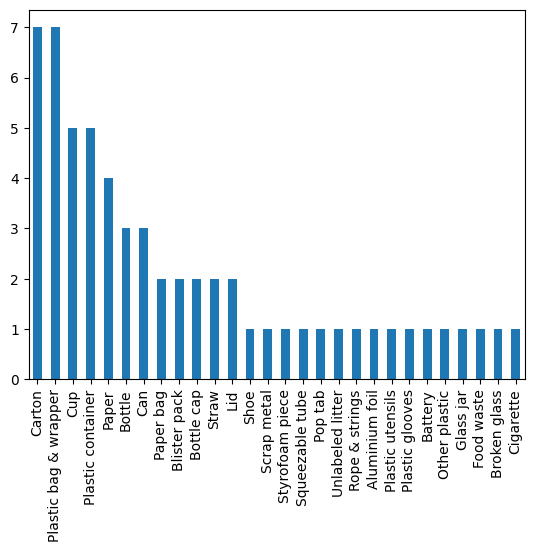

In [ ]:
df_categ['supercategory'].value_counts().plot(kind='bar')

#### Show number of images

In [ ]:
# Number of images
print('Number of images: ', len(data['images']))


Number of images:  1500


### Analizing Annotations object list

'annotations' contains all the information of an image

    id - id of its own
    image_id - id of the image to which it belongs
    category_id - id of the category to which it belongs
    segmentation - list of points that defines its shape, each point is represented as an xy cordinate
    area - number of pixels 
    bbox - is the coordinates for the bounding box (x, y, widht, height)
    iscrowd - crowd of object, 
        0 means it is a crowd, 
        1 means it is not a crowd, is a single object.

Show how looks a annotation

In [ ]:
data['annotations'][0]

{'id': 1,
 'image_id': 0,
 'category_id': 6,
 'segmentation': [[561.0,
   1238.0,
   568.0,
   1201.0,
   567.0,
   1175.0,
   549.0,
   1127.0,
   538.0,
   1089.0,
   519.0,
   1043.0,
   517.0,
   1005.0,
   523.0,
   964.0,
   529.0,
   945.0,
   520.0,
   896.0,
   525.0,
   862.0,
   536.0,
   821.0,
   554.0,
   769.0,
   577.0,
   727.0,
   595.0,
   678.0,
   596.0,
   585.0,
   588.0,
   346.0,
   581.0,
   328.0,
   569.0,
   306.0,
   570.0,
   276.0,
   576.0,
   224.0,
   560.0,
   205.0,
   564.0,
   170.0,
   578.0,
   154.0,
   608.0,
   136.0,
   649.0,
   127.0,
   688.0,
   127.0,
   726.0,
   129.0,
   759.0,
   141.0,
   784.0,
   153.0,
   792.0,
   177.0,
   788.0,
   193.0,
   782.0,
   209.0,
   792.0,
   238.0,
   802.0,
   271.0,
   802.0,
   294.0,
   791.0,
   319.0,
   789.0,
   360.0,
   794.0,
   395.0,
   810.0,
   529.0,
   819.0,
   609.0,
   841.0,
   675.0,
   882.0,
   728.0,
   916.0,
   781.0,
   928.0,
   802.0,
   938.0,
   834.0,
   940.0,
  

### Show the number of annotations per category:

In [ ]:
# Create a Dataframe annotations
import numpy as np

df_anns = pd.DataFrame(data['annotations'])
df_anns.set_index('id')

# get the count of unique values ​​for the category_id column.
cat_id = df_anns['category_id'].value_counts()

# get the category name of each id 
name_cat = []
for id_cat in cat_id.index : 
    name_cat.append(df_categ['name'][id_cat]) 



In [ ]:
from pandas.core.window.expanding import Axis
# Create a Dataframe that contains each category name and its number of annotations
anns_cat = pd.DataFrame({
    'category_name': name_cat,
    'n_anns': cat_id
    })

anns_cat.head()

,category_name,n_anns
59,Cigarette,667
58,Unlabeled litter,517
36,Plastic film,451
5,Clear plastic bottle,285
29,Other plastic,273


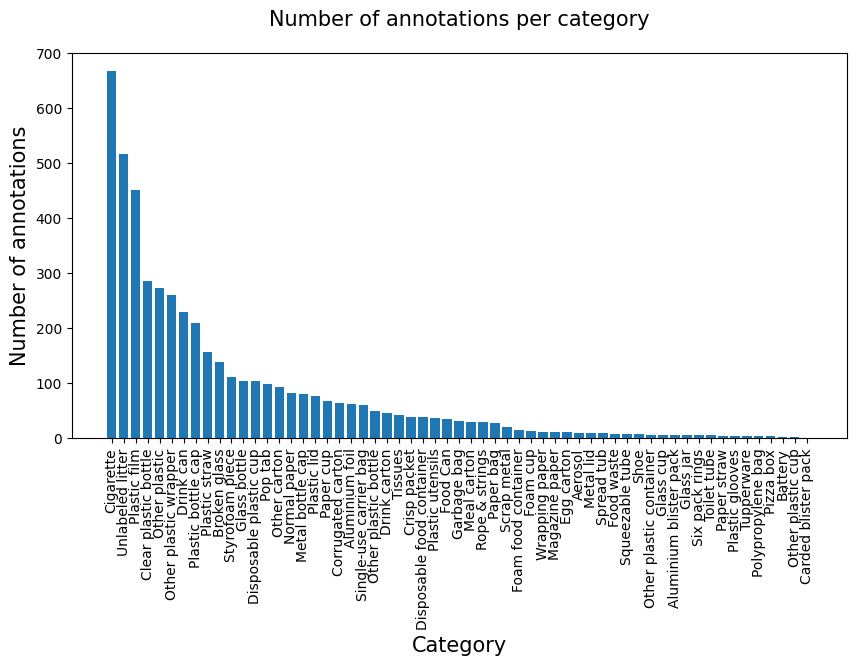

In [ ]:
plt.figure(figsize=(10, 5))

plt.bar(anns_cat['category_name'], anns_cat['n_anns'])
plt.xticks(rotation=90)
plt.title("Number of annotations per category", pad=20, fontsize=15)
plt.xlabel("Category", fontsize=15)
plt.ylabel("Number of annotations", fontsize=15)
plt.show()


